In [1]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from datetime import date as dt
from datetime import datetime

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

import tqdm
import tensorflow_addons as tfa
from keras_tqdm import TQDMNotebookCallback
from tqdm.keras import TqdmCallback

df = pd.read_csv('Datasets/covid_19_india.csv')

df.head()

Using TensorFlow backend.


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [2]:
tqdm.__version__

'4.45.0'

In [3]:
df['Date']
#df['Date'] = pd.to_datetime(df.Date)

D=[]
for item in df['Date']:
    day = item[0]+item[1]
    month = item[3] + item[4]
    year = item[6] + item[7]
    xx = day + '-' + month + '-' + year
    xx = datetime.strptime(xx, '%d-%m-%y') 
    D.append(xx)

#df = df.loc[df['Date'] == nod, 'Confirmed'].sum()

df['Date'] = D

#df['Date'] = df['Date'].astype('datetime64[ns]') 

df


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,5:00 PM,Telengana,-,-,321,26,1004
1410,1411,2020-04-28,5:00 PM,Tripura,-,-,2,0,2
1411,1412,2020-04-28,5:00 PM,Uttarakhand,-,-,33,0,51
1412,1413,2020-04-28,5:00 PM,Uttar Pradesh,-,-,400,31,2043


In [4]:
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')
df['Time'] = pd.to_datetime(df.Time)
df['time_delta'] = (df['Time'] - df['Time'].min())  / np.timedelta64(1,'D')

df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,date_delta,time_delta
0,1,2020-01-30,2020-05-02 18:00:00,Kerala,1,0,0,0,1,0.0,0.333333
1,2,2020-01-31,2020-05-02 18:00:00,Kerala,1,0,0,0,1,1.0,0.333333
2,3,2020-02-01,2020-05-02 18:00:00,Kerala,2,0,0,0,2,2.0,0.333333
3,4,2020-02-02,2020-05-02 18:00:00,Kerala,3,0,0,0,3,3.0,0.333333
4,5,2020-02-03,2020-05-02 18:00:00,Kerala,3,0,0,0,3,4.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
1409,1410,2020-04-28,2020-05-02 17:00:00,Telengana,-,-,321,26,1004,89.0,0.291667
1410,1411,2020-04-28,2020-05-02 17:00:00,Tripura,-,-,2,0,2,89.0,0.291667
1411,1412,2020-04-28,2020-05-02 17:00:00,Uttarakhand,-,-,33,0,51,89.0,0.291667
1412,1413,2020-04-28,2020-05-02 17:00:00,Uttar Pradesh,-,-,400,31,2043,89.0,0.291667


In [5]:
df = df.sort_values(by=['date_delta'])
df.drop(df.iloc[:, 0:8], inplace = True, axis = 1)
df.drop(['time_delta'], inplace = True, axis = 1)
df = df.groupby(['date_delta'],as_index=False).sum()

df

,date_delta,Confirmed
0,0.0,1
1,1.0,1
2,2.0,2
3,3.0,3
4,4.0,3
...,...,...
85,85.0,23452
86,86.0,24893
87,87.0,26605
88,88.0,28160


In [6]:
X = df['date_delta']
y = df['Confirmed']


X=np.array(X,dtype='float')
y = np.array(y,dtype='int')



X=X.reshape(-1,1)
y=y.reshape(-1,1)




In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=False)
#X_test
from sklearn.preprocessing import PolynomialFeatures
#poly_reg = PolynomialFeatures(degree = 4)
#X_poly = poly_reg.fit_transform(X_train)

#X_poly

In [8]:
model = Sequential()
model.add(Dense(500, input_dim=1, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [9]:
optimizer = tf.keras.optimizers.RMSprop(0.0099)
model.compile(loss='mean_squared_error',optimizer=optimizer)
model.fit(X_train,y_train,epochs=5000, verbose=0)
#callbacks=[TQDMNotebookCallback()] for TQDM Progress

In [10]:
#X_test1 = poly_reg.fit_transform(X_test)

predict=model.predict(X_test)

#print(predict)
#print(y)
print(X_test)
print('*************')

X_test2 = []

for item in X_test:
    X_test2.append(item[0])
    
print(predict)
print('*************')
print(y_test)
print('*************')

[[63.]
 [64.]
 [65.]
 [66.]
 [67.]
 [68.]
 [69.]
 [70.]
 [71.]
 [72.]
 [73.]
 [74.]
 [75.]
 [76.]
 [77.]
 [78.]
 [79.]
 [80.]
 [81.]
 [82.]
 [83.]
 [84.]
 [85.]
 [86.]
 [87.]
 [88.]
 [89.]]
*************
[[ 1810.6909]
 [ 2161.7952]
 [ 2665.3196]
 [ 3380.6565]
 [ 4262.8535]
 [ 5217.7954]
 [ 6235.761 ]
 [ 7267.1333]
 [ 8306.29  ]
 [ 9358.693 ]
 [10413.916 ]
 [11473.384 ]
 [12536.3125]
 [13599.934 ]
 [14663.557 ]
 [15727.178 ]
 [16790.8   ]
 [17854.787 ]
 [18921.385 ]
 [19988.299 ]
 [21055.213 ]
 [22122.127 ]
 [23190.45  ]
 [24259.904 ]
 [25329.36  ]
 [26399.35  ]
 [27469.916 ]]
*************
[[ 2069]
 [ 2547]
 [ 3072]
 [ 3577]
 [ 4281]
 [ 4789]
 [ 5274]
 [ 5865]
 [ 6761]
 [ 7529]
 [ 8447]
 [ 9352]
 [10815]
 [11933]
 [12759]
 [13835]
 [14792]
 [16116]
 [17656]
 [18985]
 [20471]
 [21700]
 [23452]
 [24893]
 [26605]
 [28160]
 [29834]]
*************


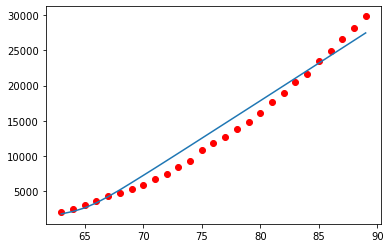

In [11]:
#limsx = [0, 150]
#limsy = [500, 30000]
#plt.xlim(limsx)
#plt.ylim(limsy)
plt.scatter(X_test, y_test, color = 'red')
plt.plot()
plt.plot(X_test, predict)